<a href="https://colab.research.google.com/github/kslim1025/TF_Keras_RNN/blob/master/RNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thu Oct  1 08:27:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    571MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

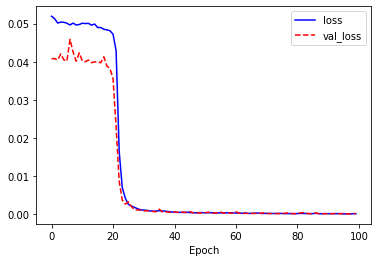

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 100, 30)           3060      
_________________________________________________________________
gru_9 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0611 - val_loss: 0.0470
Epoch 2/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0486 - val_loss: 0.0469
Epoch 3/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0481 - val_loss: 0.0473
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0482 -

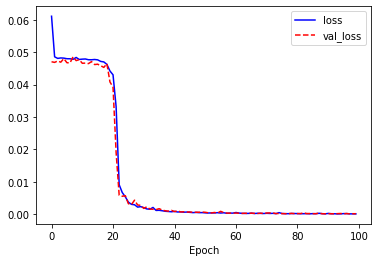

14/14 [==============================] - 0s 4ms/step - loss: 2.2465e-04
0.014154004437957347 	 0.04777606 	diff: 0.033622053878273425
0.22492296598176703 	 0.23369323 	diff: 0.008770261190130857
0.6261240027440887 	 0.6446802 	diff: 0.018556199263204953
0.38980162935391194 	 0.4058211 	diff: 0.01601948542460674
0.9073499539297949 	 0.90846705 	diff: 0.001117100437270535
correctness: 97.95454545454545 %


In [6]:
# MNIST 문자열 분석으로 유명한 데이터셋이 패션에 관한 데이터 세트를 만듬 그게 FashionMINIST 데이터셋이다.
# 데이터 이미지가 0에서 255까지 값을 가지는 28x28이미지라는 것을 확인가능
# 정답이 되는 라벨을 확인하기 위해 print를 붙여서  확인
# 외부 데이터를 이용한 정제과정
# ctrl+enter를 사용한 런타임가능
# !nvidia-smi : 어떤 GPU를 사용하는지 확인가능한 명령어 
#

try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.

import numpy as np;
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt;
import math;
################################################################################
!nvidia-smi
       
#+-----------------------------------------------------------------------------+
#| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
#|-------------------------------+----------------------+----------------------+
#| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
#| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
#|                               |                      |               MIG M. |
#|===============================+======================+======================|
#|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
#| N/A   51C    P0    35W / 250W |   1581MiB / 16280MiB |      0%      Default |
#|                               |                      |                 ERR! |
#+-------------------------------+----------------------+----------------------+
#                                                                               
#+-----------------------------------------------------------------------------+
#| Processes:                                                                  |
#|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
#|        ID   ID                                                   Usage      |
#|=============================================================================|
#|  No running processes found                                                 |
#+-----------------------------------------------------------------------------+

################################################################################

X = []
Y = []

for i in range(3000):
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다.
  lst = np.random.rand(100)
  
  # 마킹할 숫자 2개의 인덱스를 뽑습니다.
  idx = np.random.choice(100, 2, replace=False)
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다
  zeros = np.zeros(100)
  zeros[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst))))
  #마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.GRU(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer= 'adam', loss='mse')
model.summary()

X = np.array(X)
Y = np.array(Y)

#GRU 레이러를 사용한 네트워크 파라미터 수는 LSTM레이어 네트워크 보다 약23.3% 감소한 수치입니다.
#2560개의 데이터만 학습 진행, 검증 데이터는 20%로 지정
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[:2560:2560+5])
# 5개의 테스트 데이터에 대한 예측을 표시하기
for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
  prediction = model.predict(X[2560:])
  cnt = 0
  for i in range(len(prediction)):
    #오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i])> 0.04:
      cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')